# Mathematik für Biologiestudierende II

Sommersemester 2025

15.04.2025

&copy; 2025 Prof. Dr. Rüdiger W. Braun 

In [4]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
sns.set_theme()

# Multiples Testen

### Beispiel Gummibärchen

<img src="bilder/signi1.png" alt="Cartoon von xkcd" width="75%"/>

&copy; xkcd.com

<img src="bilder/signi2.png" alt="Cartoon von xkcd" width="75%"/>

<img src="bilder/signi3.png" alt="Cartoon von xkcd" width="75%"/>

<img src="bilder/signi4.png" alt="Cartoon von xkcd" width="75%"/>

* Ein Fall von Data Snooping
* Bei einem Signifikanztest zum Nivea $\alpha=0.05$ wird in 5% der Fälle die Nullhypothese fälschlich abgelehnt
* In dem Beispiel des Cartoons gibt es 20 Experimente; es ist zu erwarten, dass in einem Fall die Nullhypothese zu unrecht abgelehnt wird

* wenn wir gemäß Bonferroni korrigieren, dann müssen wir jeden einzelnen Test zum Signifikanzniveau $\frac\alpha{20}$ durchführen

# ANOVA

* ANOVA: Analysis of Variance
* Ziel: Vergleich bei Vorliegen von mehr als zwei Gruppen

Welche Daten hat man?

* Eine Population
* Eine Zielvariable.  Das ist die kontinuierliche Größe, die gemessen wird.
* Einen Faktor.  Das ist eine kategorielle (also qualitative oder diskrete quantitative) Größen, von der man nachweisen will, dass sie die Zielvariable beeinflusst
* Alle Mitglieder der Population, bei denen der Faktor denselben Wert hat, bilden eine *Gruppe*

* Wenn man nur zwei Gruppen hat, dann macht man einen unverbundenen, zweiseitigen t-Test

### Beispiel Schadstoffkonzentration

* An fünf verschiedenen Messstellen wurde die Konzentration eines Schadstoffs gemessen
* Hat die Messstelle einen Einfluss auf die Konzentration?

* Die Messstelle ist der Faktor
* Die Konzentration ist die Zielvariable
* es gibt fünf Gruppen, eine für jede Messstelle

In [5]:
u_schad = "https://www.math.uni-duesseldorf.de/~braun/bio2324/data/schadstoffe.csv"
df = pd.read_csv(u_schad, index_col=0)
df

,Messstelle,Konzentration
0,5,0.000867
1,3,0.000490
2,1,0.000589
3,1,0.000950
4,4,0.001152
...,...,...
75,5,0.000918
76,3,0.000528
77,3,0.000961
78,4,0.001272


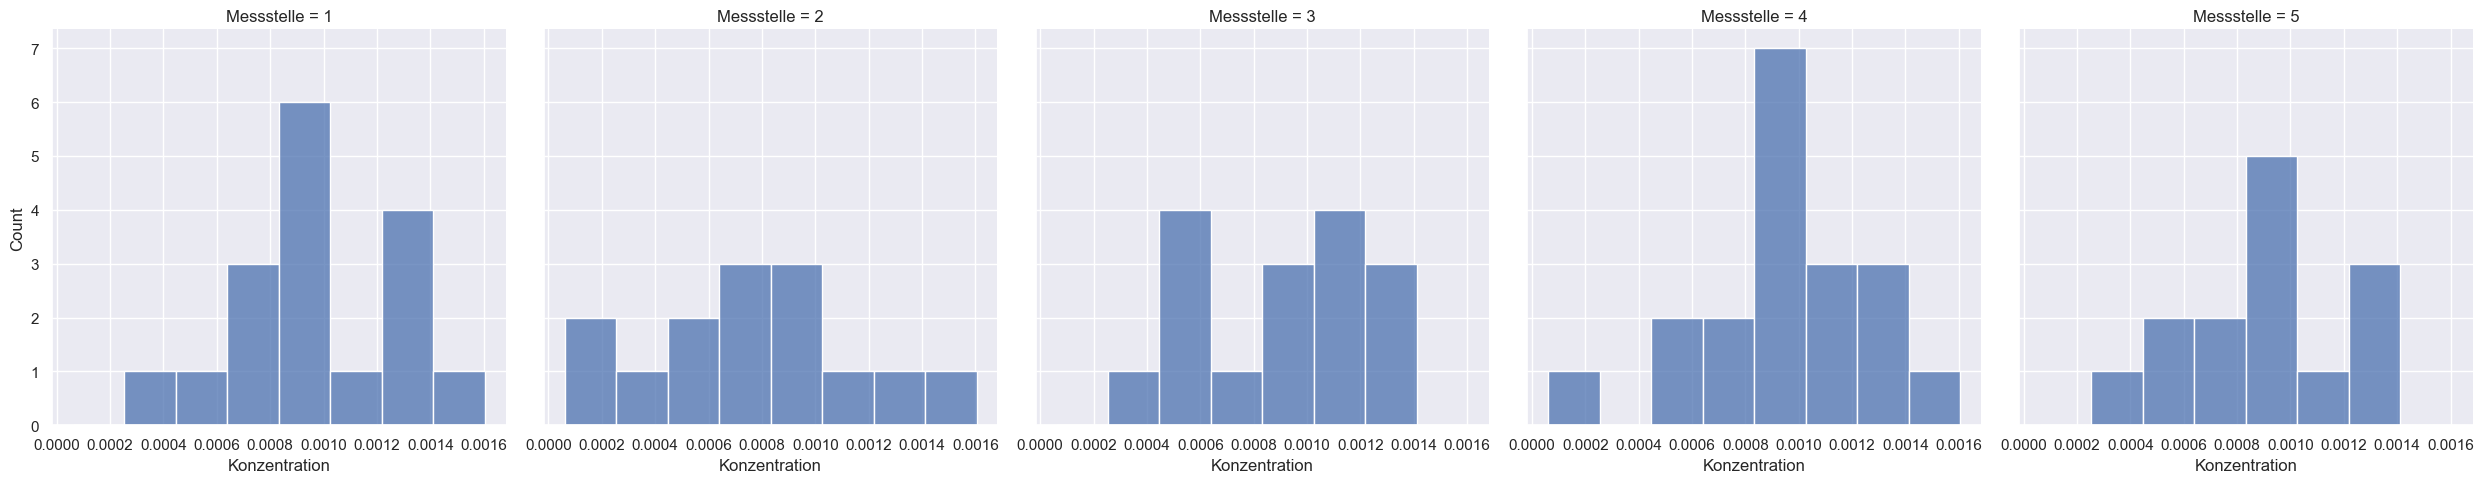

In [13]:
sns.displot(data=df, x='Konzentration', col='Messstelle');

Wir müssen die Gruppen mit `pandas` trennen

In [14]:
g1 = df[df.Messstelle==1].Konzentration
g1

2     0.000589
3     0.000950
13    0.001301
14    0.001605
18    0.000927
22    0.001250
28    0.000965
33    0.000669
41    0.000712
42    0.001019
45    0.000780
54    0.001306
61    0.001006
64    0.001057
65    0.000381
70    0.000919
74    0.001323
Name: Konzentration, dtype: float64

In [15]:
g2 = df[df.Messstelle==2].Konzentration
g3 = df[df.Messstelle==3].Konzentration
g4 = df[df.Messstelle==4].Konzentration
g5 = df[df.Messstelle==5].Konzentration

In [16]:
res = stats.f_oneway(g1, g2, g3, g4, g5)
res

F_onewayResult(statistic=np.float64(0.8666121588849811), pvalue=np.float64(0.48807057520065544))

* es wurde eine *one way ANOVA* gerechnet, also eine mit nur einem Faktor

* Der p-Wert ist 0.5
* Die Messstelle hat keinen Einfluss auf die Konzentration

Welche Verteilung benutzt dieser Test?

* Die F-Verteilung dient zum Vergleich zweier Varianzen
* Sie hat zwei Parameter:
  * bei der einfaktoriellen ANOVA ist der erste Parameter gleich $g-1$, wenn $g$ die Anzahl der Gruppen ist
  * und der zweite ist $n-g$, wenn $n$ der Stichprobenumfang ist

* Im Beispiel: $g=5$, $n=80$

In [17]:
P = stats.f(4, 75)
1 - P.cdf(res.statistic)

np.float64(0.48807057520065544)

Zum Vergleich

In [19]:
res.pvalue

np.float64(0.48807057520065544)

### Haben unterschiedliche Pinguinarten unterschiedliche Schnabellängen?

In [20]:
df = sns.load_dataset("penguins") 
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


Einschub:

* Was ist der Unterschied zwischen `sns.load_dataset` und `pd.read_csv`

* `sns.load_dataset` lädt einen von einem Dutzend sorgfältig vorbereiteten Datensätzen, die von den Programmiererinnen und Programmieren von `seaborn` bereit gestellt werden
* `pd.read_csv` kann beliebige `csv`-Datei einlesen

* es gibt auch noch `pd.read_excel` zum Einlesen von `*.xlsx` und `*.ods`-Dateien

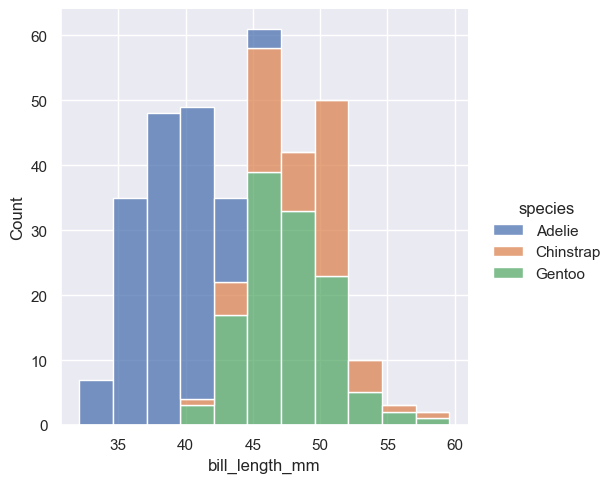

In [34]:
sns.displot(df, x='bill_length_mm', hue='species', multiple='stack');

In [27]:
df.species.value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [28]:
gA = df[df.species=='Adelie'].bill_length_mm
gA

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
147    36.6
148    36.0
149    37.8
150    36.0
151    41.5
Name: bill_length_mm, Length: 152, dtype: float64

In [29]:
gG = df[df.species=='Gentoo'].bill_length_mm
gC = df[df.species=='Chinstrap'].bill_length_mm

In [30]:
stats.f_oneway(gA, gG, gC)

F_onewayResult(statistic=np.float64(nan), pvalue=np.float64(nan))

* Was ist das Problem?

* Es gibt Einträge ohne Werte

In [39]:
res = stats.f_oneway(gA.dropna(), gG.dropna(), gC.dropna())
res

F_onewayResult(statistic=np.float64(410.6002550405077), pvalue=np.float64(2.6946137388895484e-91))

Also haben unterschiedliche Pinguinarten unterschiedliche Schnabellängen

Wir hätten auch drei t-Tests rechnen können

In [41]:
r1 = stats.ttest_ind(gA.dropna(), gG.dropna())
r1

TtestResult(statistic=np.float64(-25.09530115900974), pvalue=np.float64(9.324042980315958e-73), df=np.float64(272.0))

In [42]:
r2 = stats.ttest_ind(gA.dropna(), gC.dropna())
r2

TtestResult(statistic=np.float64(-23.801939237440887), pvalue=np.float64(2.011759018655462e-62), df=np.float64(217.0))

In [43]:
r3 = stats.ttest_ind(gG.dropna(), gC.dropna())
r3

TtestResult(statistic=np.float64(-2.7694045269151144), pvalue=np.float64(0.006175813141889592), df=np.float64(189.0))

* Das ist multiples Testen, muss also korrigiert werden

* Drei Tests gerechnet
* Gewünscht: $\alpha=0.01$
* Bonferroni-Korrektur:  Jeden einzelnen Test zu $\frac\alpha3 = 0.003333$ auswerten

* Zu $\alpha=0.01$ werden Unterschiede in den Schnabellängen zwischen Adelie- und Eselspinguinen und zwischen Adelie- und Zügelpinguinen gefunden
* Der Unterschied zwischen Esels- und Zügelpinguinen ist nicht signifikant

* Üblicherweise kombiniert man beide Ansätze
* Stichwort *Posthoc Analyse*